# Identifikasi warna kulit menggunakan Kmeans-Clustering dan Logika Fuzzy

Import semua modul yang diperlukan

In [7]:
import cv2
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from sklearn.cluster import KMeans
import cv2 as cv
from collections import Counter
from PIL import Image
from numpy import asarray

## Untuk mendeteksi warna kulit, maka gunakan K-means clustering 

Membaca inputan gambar

In [8]:
img = cv2.imread('C:\Project AI\putih.jpg',1)

mengkonversi gambar menjadi skala abu-abu dan memasukkan file haarcascade_frontalface_default.xml

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
face_cascade = cv2.CascadeClassifier('C:\Project AI\haarcascade_frontalface_default.xml')

Deteksi bagian wajah dan memberi output berupa gambar inputan dan gambar bagian wajah saja

In [10]:
faces = face_cascade.detectMultiScale(gray, 1.5, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), 
                  (0, 0, 255), 2)
      
    faces = img[y:y + h, x:x + w]
    
    cv2.imshow("Detected Face",faces)
    cv2.imwrite('Face.jpg', faces)
    
  
cv2.imshow('original image', img)
cv2.waitKey()

-1

Memberikan rentang warna kulit maksimum dan minimum

In [11]:
minimumRange = np.array([0,133,77],np.uint8) # untuk rentang warna kulit (minimum)
maximumRange = np.array([235,173,127],np.uint8) # untuk rentang warna kulit (maksimum)

Membaca gambar yang terdeteksi

In [12]:
img = cv2.imread("C:\Project AI\putih.jpg")

Mengubah gambar bgr ke ycr dengan menggunakan metode cvtcolor()

In [13]:
YCRimage = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

Menerapkan rentang min atau maks pada area kulit di gambar

In [14]:
skinArea = cv2.inRange(YCRimage,minimumRange,maximumRange)
detectedSkin = cv2.bitwise_and(img, img, mask = skinArea)

cv2.imwrite("C:\Project AI\detectedImage.png", np.hstack([detectedSkin]))

True

Menggunakan metode K-Means Clustering untuk menentukan warna kulit

In [15]:
img = cv.imread('C:\Project AI\putih.jpg')   # jalur gambar asli

image = cv.imread('C:\Project AI\detectedImage.png') # jalur deteksi kulit

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

resized_image = cv.resize(image, (1200, 600))


def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_image(image_path):
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    return image


# deteksi gambar ke numpy array
data = asarray(image)


# Buat gambar 
image2 = Image.fromarray(data)


modified_image = cv.resize(image, (600, 400), interpolation = cv.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


clf = KMeans(n_clusters = 2)
labels = clf.fit_predict(modified_image)

counts = Counter(labels)

center_colors = clf.cluster_centers_

# mendapatkan warna yang diinginkan 
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]   


c1=hex_colors[0]
c2=hex_colors[1]

d1=c1.lstrip('#')
d2=c2.lstrip('#')

res1 = int(d1, 16)
res2 = int(d2, 16)

if 8421504>res1>0: #Dibuat agar program mengabaikan warna latar belakang
    fc=res2
    print("The detected skin tone is:",res2," with hex color code as",c2)

else:
    fc=res1
    print("The detected skin tone is:",res1,"(bg color) with hex color code as",c1)  


print("The detected skintone is:")
font = cv.FONT_HERSHEY_TRIPLEX

if 16777215>fc>12619362: # rentang warna kulit putih
    print("Putih")
 
    cv.putText(img,'Skin Tone: Putih',(10,50), font, 1,(0,255,0),2)
    cv.imshow("Result",img)
    cv.waitKey(0)


elif 12619362>fc>10300000:    # rentang warna kulit berwarna
    print("Berwarna")
    
    cv.putText(img,'Skin Tone: Berwarna',(10,50), font, 0.5,(0,255,0),2)
    cv.imshow("Result",img)
    cv.waitKey(0)

else:
    print("Gelap")    # rentang warna kulit hitam
    cv.putText(img,'Skin Tone: Gelap',(10,50), font, 0.5,(0,255,0),2)
    cv.imshow("Result",image)
    cv.waitKey(0)

The detected skin tone is: 14797762  with hex color code as #e1cbc2
The detected skintone is:
Putih


# Menghitung warna kulit asli berdasarkan warna kulit pada foto dan kecerahan yang digunakan pada foto menggunakan Fuzzy Logic

Fungsi keanggotan Warna Kulit
- putih (>12619362)
- kuning langsat (10300000 - 12619362)
- hitam (10000000 - 10300000)

karena rentang warna sangat banyak dan dapat memakan memori yang besar, jadi saya perkecil rentang menjadi
- putih (>2000)
- kuning langsat (1000 - 2000)
- hitam (0 - 1000)

## Fuzzyfikasi Warna Kulit

In [16]:
warna = ctrl.Antecedent(np.arange(0, 3000, 1), 'warna') # warna = ctrl.Antecedent(np.arange(0, 16777215, 1),'warna')
warna_x = np.arange(0, 2000, 1) #warna_x = np.arange(0, 16777215, 1)

Fungsi Keanggotaan :

In [17]:
warna['hitam'] = fuzz.trapmf(warna.universe,[0, 0, 100, 1000]) #warna['hitam'] = fuzz.trapmf(warna.universe,[0,0,1000000, 10300000])
warna['berwarna'] = fuzz.trapmf(warna.universe,[100, 1000, 1500, 2000]) #warna['berwarna'] = fuzz.trapmf(warna.universe,[10200000, 10300000, 11100000, 12619362])
warna['putih'] = fuzz.trapmf(warna.universe,[1500, 2000, 2500,3000]) #warna['putih'] = fuzz.trapmf(warna.universe,[11100000, 12619362,16777215,16777215])

## Plotting Membership Function Warna Kulit

Plotting fungsi keanggotaan warna kulit :

Text(0.5, 1.0, 'warna kulit gelap')

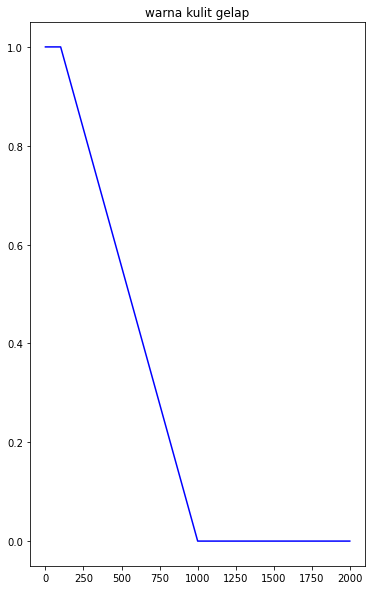

In [18]:
warna_gelap = fuzz.trapmf(warna_x,[0, 0, 100, 1000]) #warna_gelap = fuzz.trapmf(warna_x,[100000,100000,10200000,10300000])
fig, (ax0) = plt.subplots(nrows=1, figsize=(6,10))
ax0.plot(warna_x,warna_gelap,'blue')
ax0.set_title('warna kulit gelap')

Text(0.5, 1.0, 'warna kulit kuning langsat')

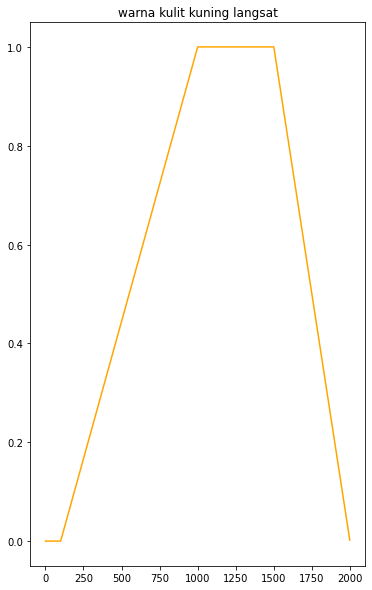

In [19]:
warna_kuning = fuzz.trapmf(warna_x,[100, 1000, 1500, 2000]) #warna_kuning = fuzz.trapmf(warna_x,[10200000, 10300000, 11000000, 12619362])
fig, (ax0) = plt.subplots(nrows=1, figsize=(6,10))
ax0.plot(warna_x,warna_kuning,'orange')
ax0.set_title('warna kulit kuning langsat')

Text(0.5, 1.0, 'warna kulit putih')

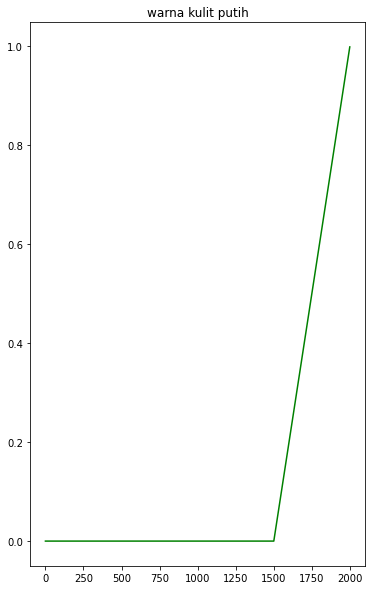

In [20]:
warna_putih = fuzz.trapmf(warna_x,[1500, 2000, 2500,3000]) #warna_putih = fuzz.trapmf(warna_x,[11100000, 12619362,16777215,16777215])
fig, (ax0) = plt.subplots(nrows=1, figsize=(6,10))
ax0.plot(warna_x,warna_putih,'green')
ax0.set_title('warna kulit putih')

Plotting ketiga fungsi keanggotaan warna kulit

C:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


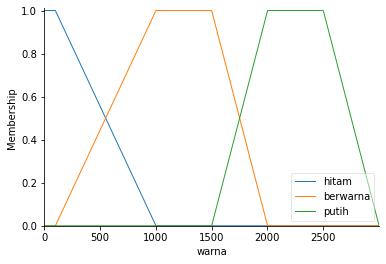

In [21]:
warna.view()

## Fuzzyfikasi Kecerahan

Untuk kecerahan memiliki rentang -100 sampai 100

In [22]:
kecerahan = ctrl.Antecedent(np.arange(-100, 100, 1),'kecerahan')
kecerahan_x = np.arange(-100,100,1) # untuk plotting

Untuk kecerahan pada gambar, fungsi keanggotaannya terdiri dari 3 value:
- kecerahan rendah (-75 sampai -50)
- kecerahan normal (-50 sampai 30)
- kecerahan penuh (30 sampai 100)

Dengan fungsi keanggotaan :

In [23]:
kecerahan['rendah'] = fuzz.trapmf(kecerahan.universe,[-100, -100, -75, -50])
kecerahan['normal'] = fuzz.trapmf(kecerahan.universe,[-75, -50, 0, 30])
kecerahan['tinggi'] = fuzz.trapmf(kecerahan.universe,[0, 30, 100, 100])

## Plotting Membership Function Kecerahan 

Plotting fungsi keanggotaan Kecerahan :

Text(0.5, 1.0, 'Kecerahan Rendah')

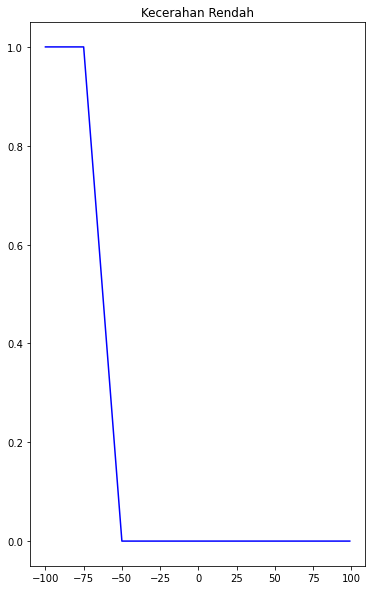

In [24]:
kecerahan_rendah = fuzz.trapmf(kecerahan_x,[-100,-100,-75,-50])
fig, (ax0) = plt.subplots(nrows=1, figsize=(6,10))
ax0.plot(kecerahan_x,kecerahan_rendah,'blue')
ax0.set_title('Kecerahan Rendah')

Text(0.5, 1.0, 'Kecerahan Normal')

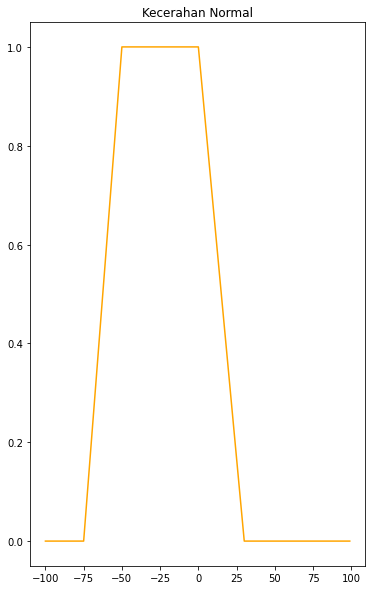

In [25]:
kecerahan_normal = fuzz.trapmf(kecerahan_x,[-75, -50, 0, 30])
fig, (ax0) = plt.subplots(nrows=1, figsize=(6,10))
ax0.plot(kecerahan_x,kecerahan_normal,'orange')
ax0.set_title('Kecerahan Normal')

Text(0.5, 1.0, 'Kecerahan Tinggi')

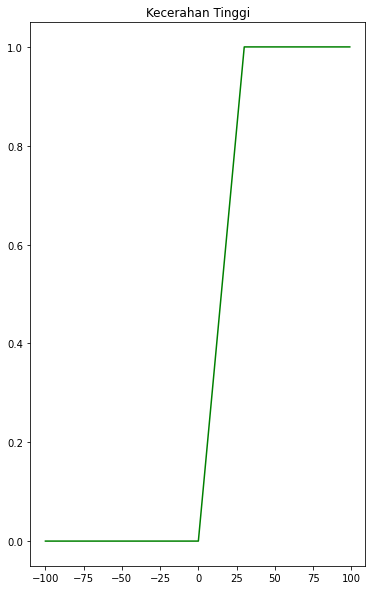

In [26]:
kecerahan_tinggi = fuzz.trapmf(kecerahan_x,[0, 30, 100, 100])
fig, (ax0) = plt.subplots(nrows=1, figsize=(6,10))
ax0.plot(kecerahan_x,kecerahan_tinggi,'green')
ax0.set_title('Kecerahan Tinggi')

Plotting ketiga fungsi keanggotaan kecerahan :

C:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


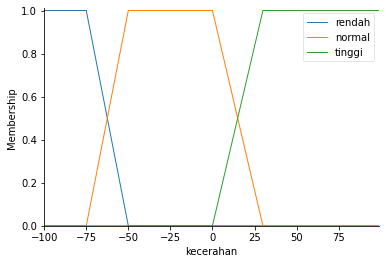

In [27]:
kecerahan.view()

## Fuzzyfikasi Output Warna Kulit Asli (tanpa kecerahan)

Untuk rentang warna kulit asli (tanpa kecerahan) 0-100

In [28]:
warna_asli = ctrl.Consequent(np.arange(0,100,1),"Warna Asli")
warna_asli_x = np.arange(0,100,1) #untuk plotting saja

Output warna kulit asli, terdiri dari 3 value :
- Hitam (5-25)
- Berwarna (mongoloid) (25-75)
- Putih (75-100)

In [29]:
warna_asli['Hitam'] = fuzz.trapmf(warna_asli.universe,[0, 0, 5, 25])
warna_asli['Berwarna'] = fuzz.trapmf(warna_asli.universe,[10,25,50,75])
warna_asli['Putih'] = fuzz.trapmf(warna_asli.universe,[40,60,75,100])

## Plotting Membership Function Warna Kulit Asli 

Plotting fungsi keanggotaan warna kulit asli

Text(0.5, 1.0, 'Warna Kulit Asli Hitam')

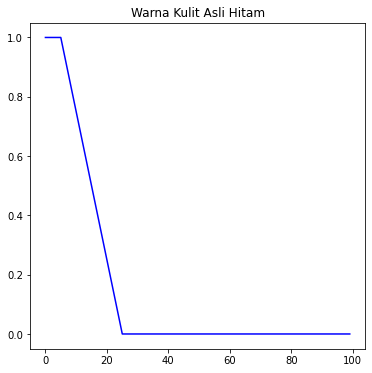

In [30]:
warna_asli_gelap = fuzz.trapmf(warna_asli_x,[0,0,5,25])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6))
ax0.plot(warna_asli_x, warna_asli_gelap,'Blue')
ax0.set_title('Warna Kulit Asli Hitam')

Text(0.5, 1.0, 'Warna Kulit Asli Berwarna')

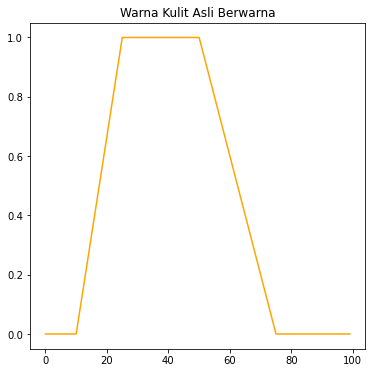

In [31]:
warna_asli_normal = fuzz.trapmf(warna_asli_x,[10,25,50,75])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6))
ax0.plot(warna_asli_x, warna_asli_normal,'Orange')
ax0.set_title('Warna Kulit Asli Berwarna')

Text(0.5, 1.0, 'Warna Kulit Asli Putih')

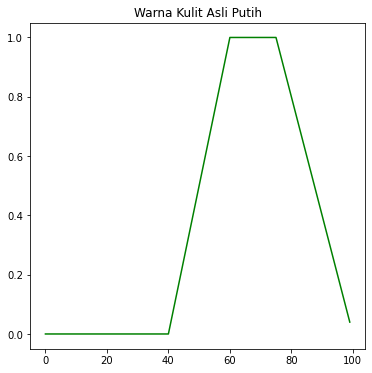

In [32]:
warna_asli_putih = fuzz.trapmf(warna_asli_x,[40,60,75,100])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6))
ax0.plot(warna_asli_x, warna_asli_putih,'Green')
ax0.set_title('Warna Kulit Asli Putih')

Plotting ketiga fungsi keanggotaan warna kulit asli

C:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


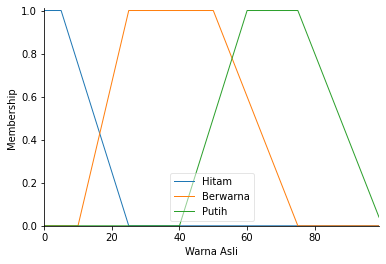

In [33]:
warna_asli.view()

## Inferencing

Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel warna kulit yang berjumlah 3 dan intensitas kecerahan yang digunakan pada foto yang berjumlah 3, maka rule yang dibuat berjumlah 3 X 3 = 9 rule.

In [34]:
rule1 = ctrl.Rule(warna['putih'] & kecerahan['tinggi'], warna_asli['Berwarna'])
rule2 = ctrl.Rule(warna['putih'] & kecerahan['normal'], warna_asli['Putih'])
rule3 = ctrl.Rule(warna['putih'] & kecerahan['rendah'], warna_asli['Putih'])
rule4 = ctrl.Rule(warna['berwarna'] & kecerahan['tinggi'], warna_asli['Hitam'])
rule5 = ctrl.Rule(warna['berwarna'] & kecerahan['normal'], warna_asli['Berwarna'])
rule6 = ctrl.Rule(warna['berwarna'] & kecerahan['rendah'], warna_asli['Putih'])
rule7 = ctrl.Rule(warna['hitam'] & kecerahan['tinggi'], warna_asli['Hitam'])
rule8 = ctrl.Rule(warna['hitam'] & kecerahan['normal'], warna_asli['Hitam'])
rule9 = ctrl.Rule(warna['hitam'] & kecerahan['rendah'], warna_asli['Berwarna'])

## Rule Evaluation 

In [35]:
hasil_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

## Defuzzifikasi 

In [36]:
hasil = ctrl.ControlSystemSimulation(hasil_ctrl)

masukkan inputan kecerahan = 30 dan warna = 1000

In [37]:
hasil.input['kecerahan'] = 30
hasil.input['warna'] = 1000

Melakukan perhitungan defuzzifikasi

In [38]:
hasil.compute()

Mencetak hasil output defuzzifikasi

In [39]:
print(hasil.output['Warna Asli'])

8.61111111111111


Plotting fungsi keanggotan kecerahan setelah dimasukkan input nilai pada kecerahan

C:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


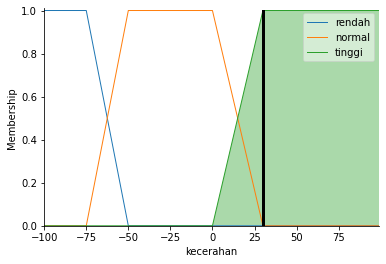

In [40]:
kecerahan.view(sim=hasil)

Plotting fungsi keanggotaan Warna kulit setelah dimasukkan input nilai pada warna kulit

C:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


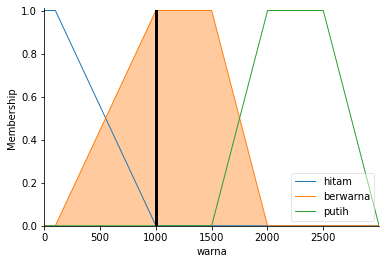

In [41]:
warna.view(sim=hasil)

Plotting fungsi keanggotaan warna kulit asli setelah dilakukan defuzzifikasi output nilai pada warna kulit asli

C:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


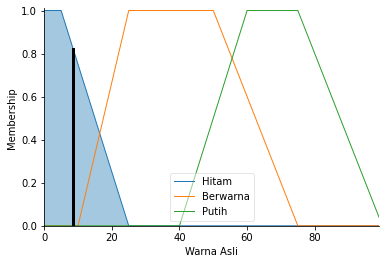

In [42]:
warna_asli.view(sim=hasil)